# Introduction:
> This task for Spam detection.

> Chech if this email is spam or not.

> Link of dataset = https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data

Load dataset from `Kaggle` to `Colab`.

In [1]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset
!unzip sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 83.7MB/s]
Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


# <font color='orange'>1. Import Libraries</font>

In [47]:
import numpy as np
import pandas as pd
import nltk
import re
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.utils import resample
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
dataset = pd.read_csv('spam.csv', encoding='latin-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


> <font size='5'> Now, I will remove `Unnamed` column beacuse, it has  only NaN value.<font>

In [49]:
dataset = dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
dataset = dataset.rename(columns={'v1': 'label', 'v2': 'text'})
dataset.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
for i in range(len(dataset)):
  if dataset['label'][i] == 'ham':
    dataset['label'][i] = 1
  else:
    dataset['label'][i] = 0

dataset.head()

,label,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


Spam:  747
Ham:  4825


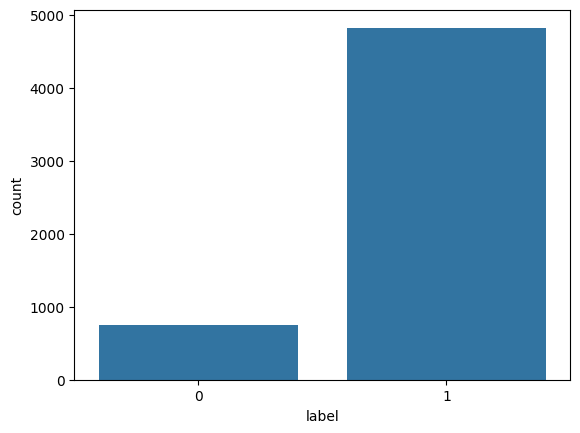

In [55]:
sns.countplot(data = dataset, x = 'label')
print('Spam: ',(dataset['label'] == 0 ).sum())
print('Ham: ', (dataset['label'] == 1 ).sum())

In [56]:
df_majority = dataset[dataset['label'] == 1] # Ham
df_minority = dataset[dataset['label'] == 0] # Spam

df_minority_upsample = resample(df_minority, replace=True, n_samples=4825, random_state=42)
dataset_upsample = pd.concat([df_majority, df_minority_upsample])
dataset_upsample.head()

,label,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
6,1,Even my brother is not like to speak with me. ...


label
1    4825
0    4825
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

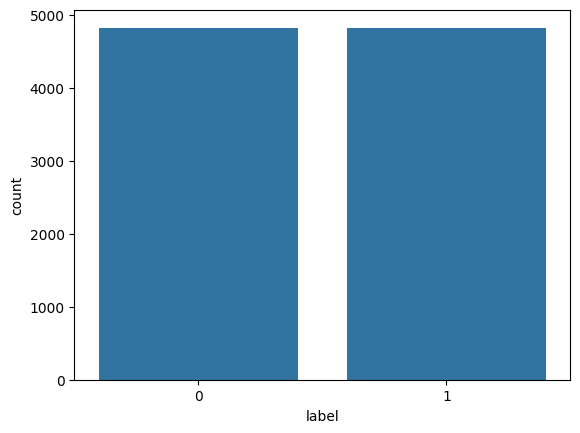

In [57]:
print(dataset_upsample['label'].value_counts())
sns.countplot(data = dataset_upsample, x = 'label')

In [58]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
def preprocess_text(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # Remove Speical characters
  text_lower = text.lower()
  tokens = nltk.word_tokenize(text_lower)
  stopwords = nltk.corpus.stopwords.words('english')
  filtered_tokens = [token for token in tokens if token not in stopwords]
  # corrected_tokens = tqdm([spell.correction(token) for token in filtered_tokens])

  processed_text = ' '.join(filtered_tokens)
  return processed_text

dataset_upsample['cleaned_text'] = dataset_upsample['text'].apply(preprocess_text)
dataset_upsample.head()

,label,text,cleaned_text
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,1,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
6,1,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent


In [69]:
dataset_upsample['label'] = dataset_upsample['label'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(dataset_upsample['cleaned_text'], dataset_upsample['label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [70]:
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.989119170984456
Confusion Matrix:
 [[931  14]
 [  7 978]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       945
           1       0.99      0.99      0.99       985

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930

